# Seattle Airbnb Data Science Project
##  Introduction
This project is completed as part of Udacity's Data Science Nanodegree programme and includes the analysis of AirBnB Seattle listings data to gain business insights. The 6 steps in the **CRISP_DM** process will be followed sequentially to:
1. Understand the business,
2. Understand the data,
3. Prepare the data,
4. Build a model(s),
5. Evaluate the model(s), and 
6. Deploy/communicate the insights.


## 1. Business understanding
In 2008 Airbnb hit the world by storm, and since then it has completely redefined the travelling experience. The business model is simple: Airbnb connects people who want to rent out empty spaces with people who are looking for accommodation in specific areas. The host takes a big cut and Airbnb takes the rest. This means that Airbnb has very little overheads, while the model is hugely scaleable. 

Airbnb records big amounts of data about their listings around the world and makes this data available to the public. Exploring and analysing these data can lead to valuable insights. 

## 2. Data understanding 
The data chosen for this project include three data sets of Airbnb listings in the Seattle area (which can be found [here](http://insideairbnb.com/seattle/)), and includes a:
1. **calender.csv** which provides listing availability and price over time,
2. **listings.csv** which includes detailed attributes about each listing, and a
3. **reviews.csv** which include in depth reviews of the listings.

Let's import the three data sets, and get an idea of what we're working with.

In [241]:
# import packages and data sets
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

listings = pd.read_csv('BlogPost/listings.csv')
calendar = pd.read_csv('BlogPost/calendar.csv')
reviews = pd.read_csv('BlogPost/reviews.csv')

listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [242]:
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [243]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


## Business questions
Now that we've had a glance at the data the following business questions were identified:
1. How does listing availability and price correlate during the year?
2. Which neighbourhood's in Seattle has the priciest listings, and how does this relate to the area's average listing rating?
3. How can we predict the price of specific listings?

Now that we have identified our questions, steps 3-6 of the **CRISP_DM** process will be completed seperately for each question.

## Question 1: How does the listing availability and price correlate? 
###### CRISP_DM Step 3: Data preparation
To answer this question we will dive deeper into the **"calendar.csv"** set.

In [244]:
# gain further data understanding
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


From above we can see that the **listing_id** needs to be converted to data type string and the **price** needs to be converted to data type float before we can continue.

In [245]:
# convert price
tofloat = lambda x: float(x[1:].replace(",","") if type(x) != float else x)                  
calendar["price"] = calendar["price"].apply(tofloat)

# extract month  
calendar['month'] = pd.DatetimeIndex(calendar['date']).month

In [246]:
#check to see effect of code above
calendar.head()

,listing_id,date,available,price,month
0,241032,2016-01-04,t,85.0,1
1,241032,2016-01-05,t,85.0,1
2,241032,2016-01-06,f,NaN,1
3,241032,2016-01-07,f,NaN,1
4,241032,2016-01-08,f,NaN,1


In [247]:
# explore the number of unique listigs etc. 
n = calendar.nunique(axis=0)
print("Number ofunique values in each column :\n", n)

Number ofunique values in each column :
 listing_id    3818
date           365
available        2
price          669
month           12
dtype: int64


Now that the data is prepared we can move to **CRISP_DM Step 4: Modelling**. 

### Data wrangling

When the listing is not available the price = NaN, we therefore have to create dummies for the 

In [248]:
# convert t/f to numeric
calendar['available'] = calendar['available'].apply(lambda x:1 if x=='t' else 0)

# sum available listings per month and group per month
month_sum = calendar.groupby(['month']).sum()
month_sum = month_sum.drop(['listing_id'], axis=1)
month_sum = month_sum.reset_index()
month_sum

,month,available,price
0,1,64937,7981548.0
1,2,73321,9113355.0
2,3,83938,10798161.0
3,4,76037,10272371.0
4,5,79971,11159008.0
5,6,77244,11391415.0
6,7,74222,11288732.0
7,8,76347,11502179.0
8,9,77246,11065949.0
9,10,82438,11296639.0


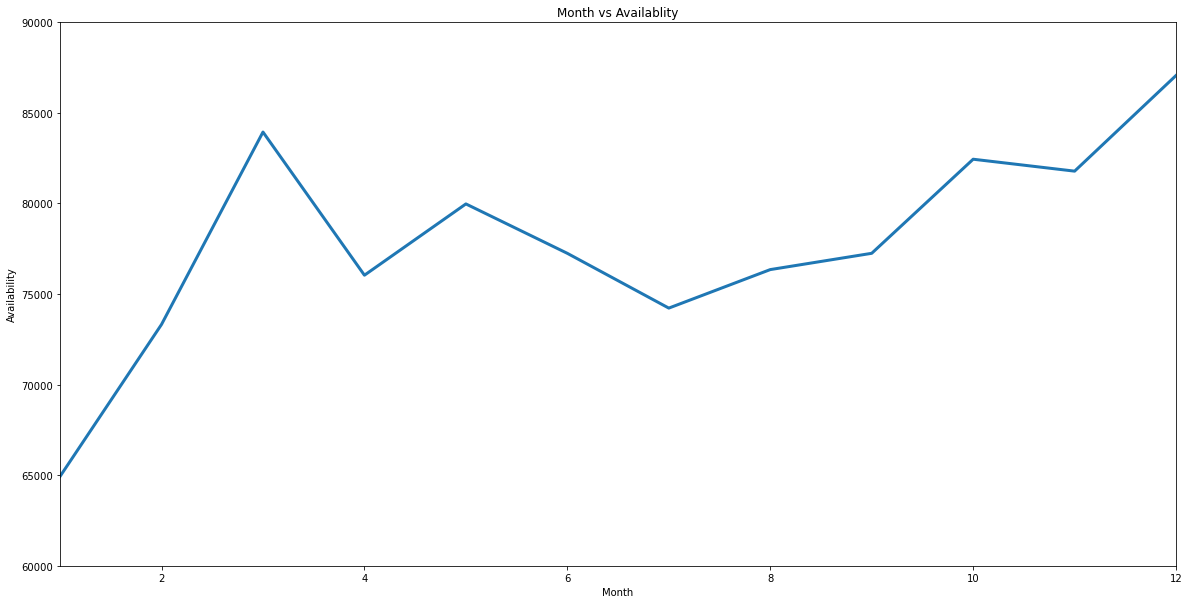

In [249]:
# plot month vs availability
plt.figure(figsize=(20, 10))
x = month_sum['month']
y = month_sum['available']
plt.plot(x,y,linewidth=3.0)
plt.xlabel('Month')
plt.ylabel('Availability')
plt.title('Month vs Availablity')
plt.axis([1, 12, 60000, 90000])
plt.grid(False)
plt.show()

In [250]:
# calculate avg price
month_sum['average price'] = month_sum['price']/month_sum['available']
month_sum

,month,available,price,average price
0,1,64937,7981548.0,122.912176
1,2,73321,9113355.0,124.293927
2,3,83938,10798161.0,128.644488
3,4,76037,10272371.0,135.097005
4,5,79971,11159008.0,139.538183
5,6,77244,11391415.0,147.473137
6,7,74222,11288732.0,152.094150
7,8,76347,11502179.0,150.656594
8,9,77246,11065949.0,143.255949
9,10,82438,11296639.0,137.031939


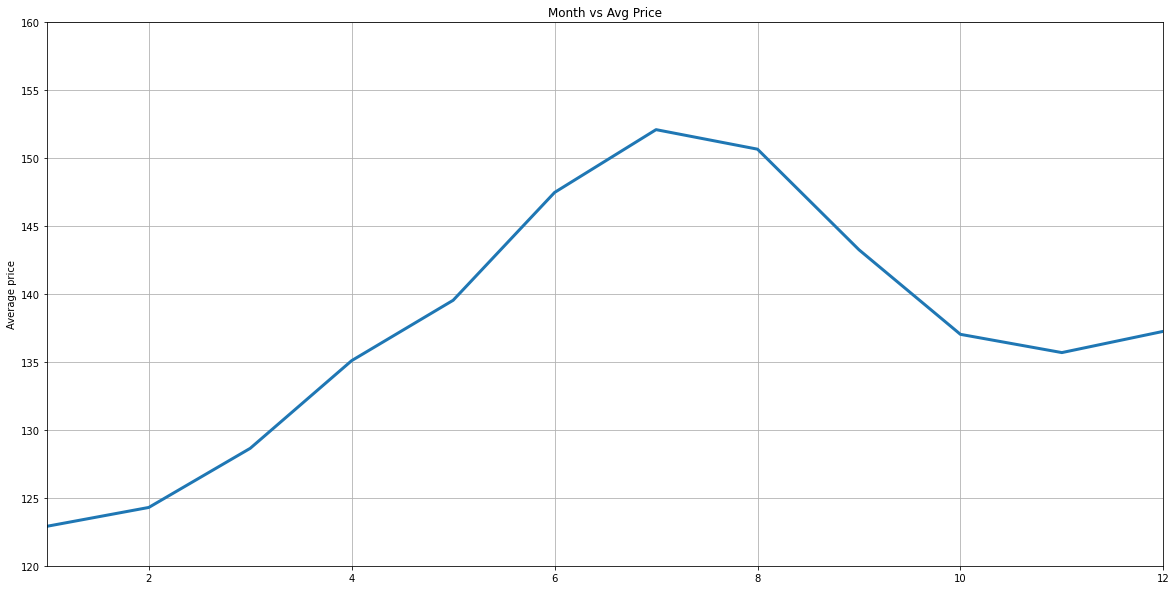

In [251]:
# month vs average price
plt.figure(figsize=(20, 10))
x = month_sum['month']
y = month_sum['average price']
plt.plot(x,y,linewidth=3.0)
plt.ylabel('Average price')
plt.title('Month vs Avg Price')
plt.axis([1, 12, 120, 160])
plt.grid(True)
plt.show()

In [252]:
# get correlation matrix 
month_sum.corr(method ='kendall')

,month,available,price,average price
month,1.000000,0.515152,0.606061,0.393939
available,0.515152,1.000000,0.363636,-0.030303
price,0.606061,0.363636,1.000000,0.606061
average price,0.393939,-0.030303,0.606061,1.000000


### Conclusion for Question 1:
It is clear from the two figures that demand increased between month 3 and 9. In the average price this was reflected as an increase. There is therefore an inverse correlation between availability (demand) and the price of a listing. From the correlation matrix however it can be seen that the correlation coefficient is only weakly negative, -0.03. This is due to the fact that the conclusion doesn't seem to hold for month 1-3 and 10-12. Nevertheless, it is safe to assume that lower availability leads to higher prices. 


## Question 2: Which neighbourhood's in Seattle has the priciest listings, and how does this relate to the area's average listing review rating?
###### CRISP_DM Step 3: Data preparation
To answer this question we will dive deeper into the **"listings.csv"** set.

In [253]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [254]:
# convert price
tofloat = lambda x: float(x[1:].replace(",","") if type(x) != float else x)                  
listings["price"] = listings["price"].apply(tofloat)

In [255]:
# group by neighbourhood with the mean of each column
listings_df_neigh = listings.groupby(['neighbourhood_cleansed']).mean()
listings_df_neigh.reset_index(inplace=True)
listings_df_neigh.sort_values(['price'],inplace=True,ascending=False)
listings_df_neigh.sample(5)

,neighbourhood_cleansed,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
18,Fairmount Park,4.952172e+06,2.016010e+13,1.409323e+07,3.896552,3.896552,47.554639,-122.380821,3.724138,1.224138,...,95.461538,9.653846,9.807692,9.807692,9.884615,9.500000,9.346154,NaN,2.413793,1.513704
55,North Queen Anne,5.313899e+06,2.016010e+13,1.425856e+07,1.925926,1.925926,47.645602,-122.365179,3.777778,1.296296,...,94.978723,9.851064,9.765957,9.808511,9.851064,9.702128,9.617021,NaN,1.203704,1.881250
44,Matthews Beach,5.291999e+06,2.016010e+13,1.552850e+07,1.421053,1.421053,47.701189,-122.278217,3.473684,1.236842,...,94.800000,9.866667,9.666667,9.933333,10.000000,9.666667,9.666667,NaN,1.263158,1.716000
7,Brighton,6.238728e+06,2.016010e+13,1.751791e+07,31.538462,31.538462,47.542223,-122.273744,3.538462,1.115385,...,95.272727,9.818182,9.545455,9.818182,9.727273,9.090909,9.727273,NaN,4.923077,3.563636
81,West Queen Anne,5.506100e+06,2.016010e+13,1.569956e+07,1.830769,1.830769,47.635703,-122.367548,3.907692,1.446154,...,95.509091,9.690909,9.727273,9.690909,9.781818,9.763636,9.563636,NaN,1.692308,2.187818


In [256]:
# subset to interested columns
listings_sub = listings_df_neigh[['neighbourhood_cleansed','review_scores_rating', 'price']]

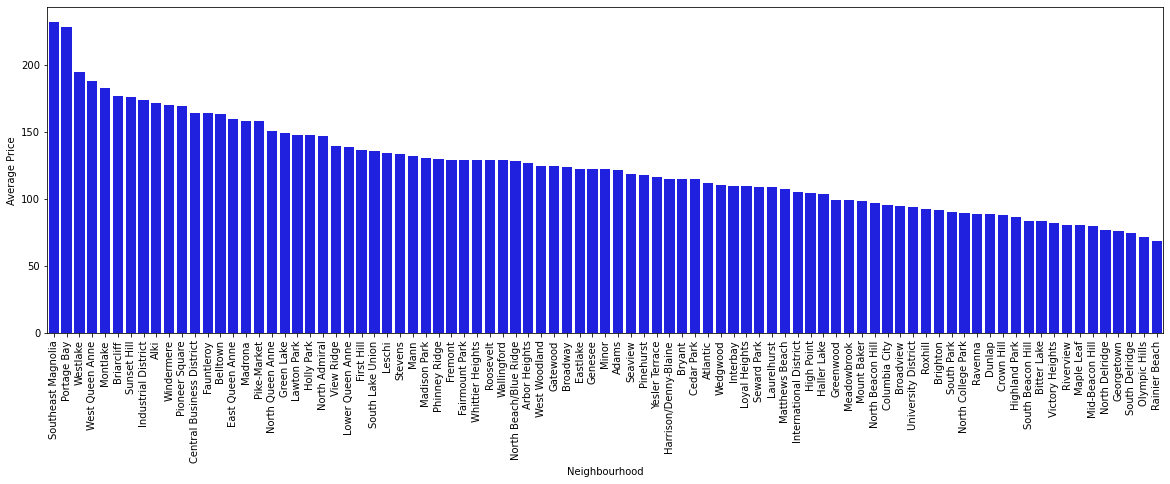

In [257]:
# plot bar chart of avg price vs neighb.
import seaborn as sb
plt.figure(figsize=(20,6))
sb.barplot(x='neighbourhood_cleansed',y='price',data=listings_sub,color='blue')
plt.xticks(rotation=90)
plt.xlabel('Neighbourhood')
plt.ylabel('Average Price')
plt.show()

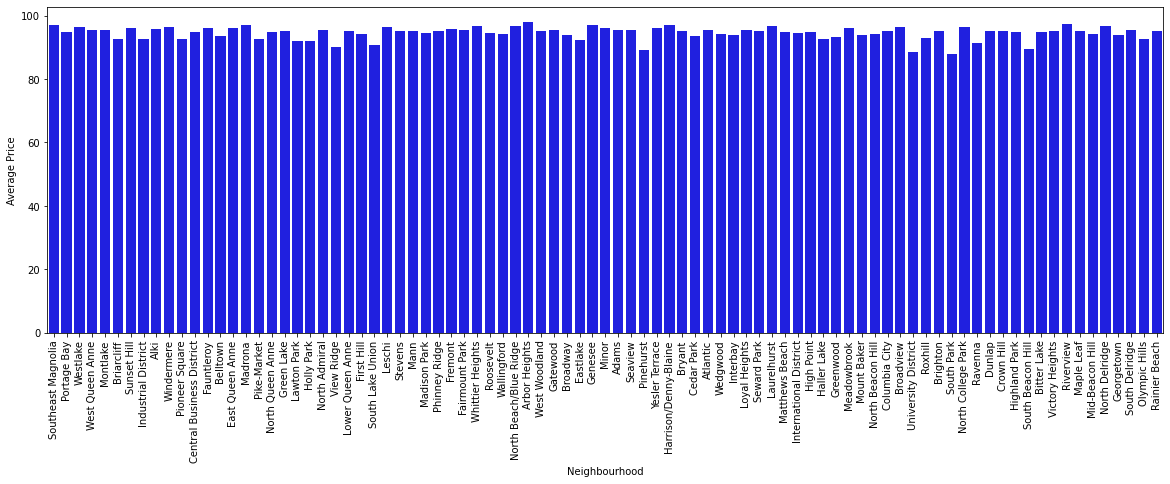

In [258]:
# plot bar chart of reviews vs neighb.
import seaborn as sb
plt.figure(figsize=(20,6))
sb.barplot(x='neighbourhood_cleansed',y='review_scores_rating',data=listings_sub,color='blue')
plt.xticks(rotation=90)
plt.xlabel('Neighbourhood')
plt.ylabel('Average Price')
plt.show()

In [259]:
# correlation matrix
listings_sub.corr(method ='kendall')

,review_scores_rating,price
review_scores_rating,1.000000,0.089596
price,0.089596,1.000000


### Conclusion for Question 2:
From figure 1 it can be seen that Magnolia and Portrage bay stand out as the most expensive neighbourhoods. However, from figure 2 it can be seen price does not correlate with rating. Rating is a subjective experience and "getting what you paid for" is the standard from which a user rates a listing. The correlation coefficient of 0.09 confirms this. 

## Question 3: How can we predict the price of specific listings? 
###### CRISP_DM Step 3: Data preparation
To answer this question we will dive deeper into the **"listings.csv"** set.

The listings.csv dataset has 92 attributes. Incorporating all of them in the price prediction model would most certainly result in overfitting. Therefore the first step would be to identify the most relevant features to include in the model, using correlation. To do this all **categorical variables must first be converted** to numerical variables and relevant **relevant missing values must be dealt with**. 

In [260]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

Using an agile approach we will use logic first to identify features that strongly correlate to price, wrangle the data and build a model, whereafter assessing the results we will decide if we should use further computing techniques to streamline the chosen features.

Using logic the following features can be identified as important for our model:
- price (what we are trying to predict)
- zipcode, latitude, longitude (captures all the relevant location data)
- accommodates, bathrooms, bedrooms, beds, square_feet, cleaning_fee, guests_included (this includes the most important listing characteristics that will correlate with price)
- Furthermore, it is probably wise to dissect "amenities" but this would require a lot of data wrangling and will be left out for now.

In [261]:
# create new listings_df with relevant features
listings_model_df = listings[['price','zipcode','longitude','latitude','accommodates','bathrooms','bedrooms',
                              'beds','square_feet','cleaning_fee','guests_included']]
listings_model_df

,price,zipcode,longitude,latitude,accommodates,bathrooms,bedrooms,beds,square_feet,cleaning_fee,guests_included
0,85.0,98119,-122.371025,47.636289,4,1.0,1.0,1.0,NaN,NaN,2
1,150.0,98119,-122.365666,47.639123,4,1.0,1.0,1.0,NaN,$40.00,1
2,975.0,98119,-122.369483,47.629724,11,4.5,5.0,7.0,NaN,$300.00,10
3,100.0,98119,-122.369279,47.638473,3,1.0,0.0,2.0,NaN,NaN,1
4,450.0,98119,-122.372471,47.632918,6,2.0,3.0,3.0,NaN,$125.00,6
...,...,...,...,...,...,...,...,...,...,...,...
3813,359.0,98107,-122.359170,47.664295,6,2.0,3.0,3.0,NaN,$230.00,1
3814,79.0,98102,-122.318309,47.649552,4,1.0,1.0,2.0,NaN,$50.00,3
3815,93.0,98178,-122.240607,47.508453,2,1.0,1.0,1.0,NaN,$35.00,2
3816,99.0,98112,-122.275530,47.632335,2,1.0,0.0,1.0,NaN,$45.00,1


In [262]:
# explore missing values
listings_miss = pd.DataFrame((listings_model_df.isnull().sum())*100/len(listings_model_df), columns=['% Missing Values'])
listings_miss[listings_miss['% Missing Values']>0]

,% Missing Values
zipcode,0.183342
bathrooms,0.419068
bedrooms,0.157150
beds,0.026192
square_feet,97.459403
cleaning_fee,26.977475


In [263]:
# from above we should clearly drop square feet
listings_model_df = listings_model_df.drop('square_feet', axis=1)

# convert cleaning fee to float and remove '$'                  
listings_model_df["cleaning_fee"] = listings_model_df["cleaning_fee"].apply(tofloat)
listings_model_df

# cleaning fee has strong correlation to price and 
listings_model_df["cleaning_fee"] = listings_model_df["cleaning_fee"].fillna(listings_model_df['cleaning_fee'].mean())

# zipcode to float
listings_model_df['zipcode'] = pd.to_numeric(listings_model_df['zipcode'],errors = 'coerce')
listings_model_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            3818 non-null   float64
 1   zipcode          3810 non-null   float64
 2   longitude        3818 non-null   float64
 3   latitude         3818 non-null   float64
 4   accommodates     3818 non-null   int64  
 5   bathrooms        3802 non-null   float64
 6   bedrooms         3812 non-null   float64
 7   beds             3817 non-null   float64
 8   cleaning_fee     3818 non-null   float64
 9   guests_included  3818 non-null   int64  
dtypes: float64(8), int64(2)
memory usage: 298.4 KB


In [264]:
# impute all other NaN variable values with the mean
num_vars = listings_model_df.select_dtypes(include=['int','float']).columns
for var in num_vars:
    listings_model_df.loc[:,var] = listings_model_df[var].fillna(listings_model_df[var].mean())

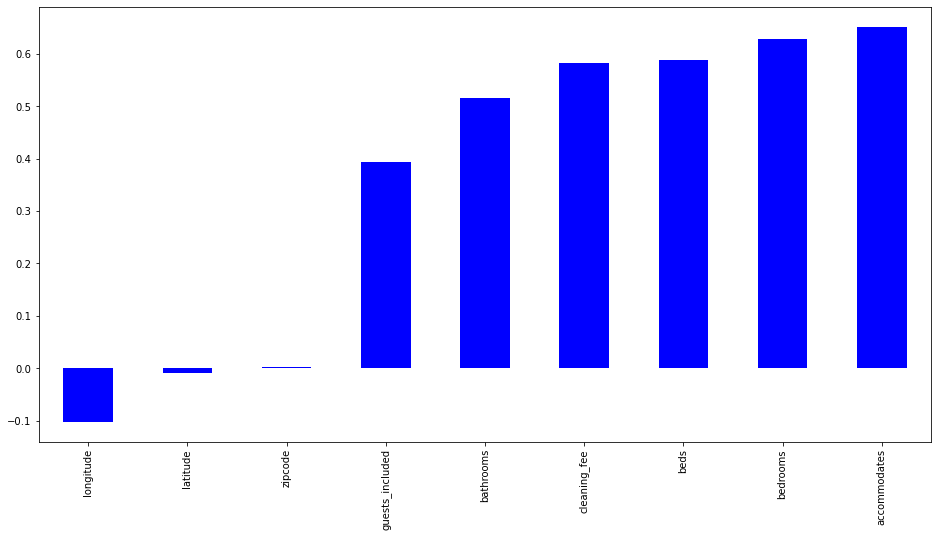

In [265]:
# plot feature correlation coefficients
plt.figure(figsize=(16,8))
listings_model_df.corr()['price'].dropna().sort_values()[:-1].plot(kind='bar', color='blue')
plt.show()

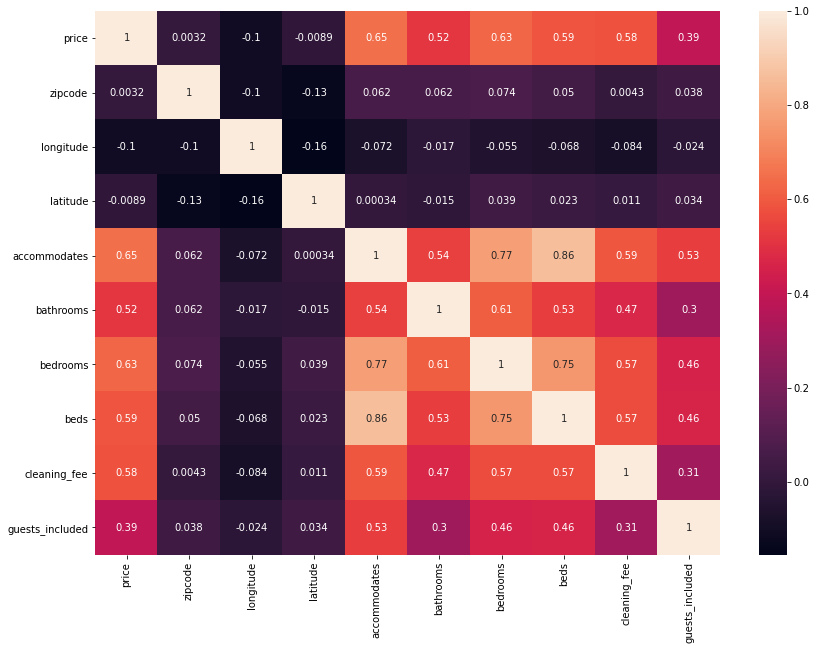

In [266]:
# heatmap of variables
plt.figure(figsize=(14,10))
corr = listings_model_df.corr()
sns.heatmap(corr, annot=True)
plt.show()

##### CRISP-DM Step 4: Build model
The data is prepared and the price prediction model can now be built.

test_score:  0.5284860668238517
train_score:  0.5219139384635081
The r-squared score for the model is 0.5284860668238517 on 1146 values. 

Rank features by their impact on the price: 
            Feature        coef   abs_coeff
1        longitude -139.217492  139.217492
2         latitude  -70.136110   70.136110
4        bathrooms   22.239539   22.239539
5         bedrooms   16.315440   16.315440
3     accommodates   15.081184   15.081184
6             beds   -4.650076    4.650076
8  guests_included    3.711982    3.711982
7     cleaning_fee    0.552907    0.552907
0          zipcode   -0.268362    0.268362 



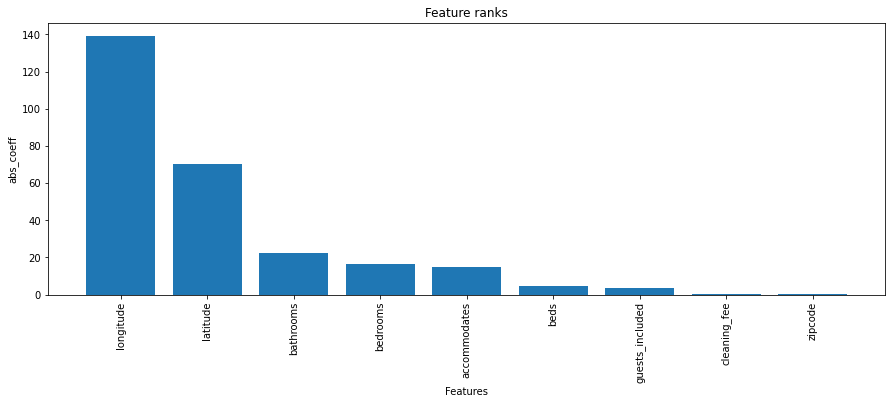

In [267]:
import numpy as np
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

y = listings_model_df['price']
X = listings_model_df.drop(columns = ['price'], inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
lm_model = LinearRegression(normalize = True)
lm_model.fit(X_train, y_train)
y_test_predict = lm_model.predict(X_test)
y_train_predict = lm_model.predict(X_train)
test_score = r2_score(y_test, y_test_predict)
train_score = r2_score(y_train, y_train_predict)

print('test_score: ',test_score)
print('train_score: ', train_score)
print('The r-squared score for the model is {} on {} values.'.format(test_score, len(y_test)),'\n')

coef_df = pd.DataFrame()
coef_df['Feature'] = X_train.columns
coef_df['coef'] = lm_model.coef_
coef_df['abs_coeff'] = np.abs(lm_model.coef_)
coef_df = coef_df.sort_values(by=['abs_coeff'], ascending=False)
print('Rank features by their impact on the price: \n', coef_df, '\n')

plt.figure(figsize = (15,5))
plt.bar(coef_df['Feature'], coef_df['abs_coeff'])
plt.xlabel('Features')
plt.xticks(coef_df['Feature'], rotation = 90)
plt.ylabel('abs_coeff')
plt.title('Feature ranks')
plt.show()

### Conclusion for Question 3:
The model has an R-squared value of 0.52 for both the train and test sets, which indicates that the model is not overfitted. A better value can probably be obtained by reiterating the process and including/removing features, but for the purpose of this project the model suffices.